In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
#pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [321]:
udemy=pd.read_csv("udemy_output_All_Business_p1_p626.csv")

# Q. Target variable being
 How to predict the no of subscribers in the next quarter

#steps to do in EDA 

1. check the data type
2. Missing values
3. Outlier Analysis.(IQR)
4. Removing insignificant columns- no varience/no info
5. Train Test split
6. scale 


In [322]:
# Getting to know the data

udemy.head()

id                                              title  \
0   762616  The Complete SQL Bootcamp 2020: Go from Zero t...   
1   937678  Tableau 2020 A-Z: Hands-On Tableau Training fo...   
2  1361790             PMP Exam Prep Seminar -  PMBOK Guide 6   
3   648826         The Complete Financial Analyst Course 2020   
4   637930  An Entire MBA in 1 Course:Award Winning Busine...   

                                                 url  is_paid  \
0                 /course/the-complete-sql-bootcamp/     True   
1                                 /course/tableau10/     True   
2                        /course/pmp-pmbok6-35-pdus/     True   
3     /course/the-complete-financial-analyst-course/     True   
4  /course/an-entire-mba-in-1-courseaward-winning...     True   

   num_subscribers  avg_rating  avg_rating_recent   rating  num_reviews  \
0           295509    4.660190           4.678740 4.678740        78006   
1           209070    4.589560           4.600150 4.600150        54581   
2           155282    4.594910           4.593260 4.593260        52653   
3           245860    4.544070           4.537720 4.537720        46447   
4           374836    4.470800           4.471730 4.471730        41630   

   is_wishlisted  num_published_lectures  num_published_practice_tests  \
0          False                      84                             0   
1          False                      78                             0   
2          False                     292                             2   
3          False                     338                             0   
4          False                      83                             0   

                created        published_time  discount_price__amount  \
0  2016-02-14T22:57:48Z  2016-04-06T05:16:11Z              455.000000   
1  2016-08-22T12:10:18Z  2016-08-23T16:59:49Z              455.000000   
2  2017-09-26T16:32:48Z  2017-11-14T23:58:14Z              455.000000   
3  2015-10-23T13:34:35Z  2016-01-21T01:38:48Z              455.000000   
4  2015-10-12T06:39:46Z  2016-01-11T21:39:33Z              455.000000   

  discount_price__currency discount_price__price_string  price_detail__amount  \
0                      INR                         ₹455           8640.000000   
1                      INR                         ₹455           8640.000000   
2                      INR                         ₹455           8640.000000   
3                      INR                         ₹455           8640.000000   
4                      INR                         ₹455           8640.000000   

  price_detail__currency price_detail__price_string  
0                    INR                     ₹8,640  
1                    INR                     ₹8,640  
2                    INR                     ₹8,640  
3                    INR                     ₹8,640  
4                    INR                     ₹8,640

In [323]:
udemy.info()

##Getting to know about the information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9447 entries, 0 to 9446
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            9447 non-null   int64  
 1   title                         9447 non-null   object 
 2   url                           9447 non-null   object 
 3   is_paid                       9447 non-null   bool   
 4   num_subscribers               9447 non-null   int64  
 5   avg_rating                    9447 non-null   float64
 6   avg_rating_recent             9447 non-null   float64
 7   rating                        9447 non-null   float64
 8   num_reviews                   9447 non-null   int64  
 9   is_wishlisted                 9447 non-null   bool   
 10  num_published_lectures        9447 non-null   int64  
 11  num_published_practice_tests  9447 non-null   int64  
 12  created                       9447 non-null   object 
 13  pub

In [324]:
udemy.isnull().sum()

##Getting to know about the null values in the data set. 

id                                0
title                             0
url                               0
is_paid                           0
num_subscribers                   0
avg_rating                        0
avg_rating_recent                 0
rating                            0
num_reviews                       0
is_wishlisted                     0
num_published_lectures            0
num_published_practice_tests      0
created                           0
published_time                    0
discount_price__amount          510
discount_price__currency        510
discount_price__price_string    510
price_detail__amount              0
price_detail__currency            0
price_detail__price_string        0
dtype: int64

In [325]:
udemy.shape

(9447, 20)

In [326]:
num=udemy.select_dtypes(include=np.number).columns

##Storing all the numerical columns in one variable.
num

Index(['id', 'num_subscribers', 'avg_rating', 'avg_rating_recent', 'rating',
       'num_reviews', 'num_published_lectures', 'num_published_practice_tests',
       'discount_price__amount', 'price_detail__amount'],
      dtype='object')

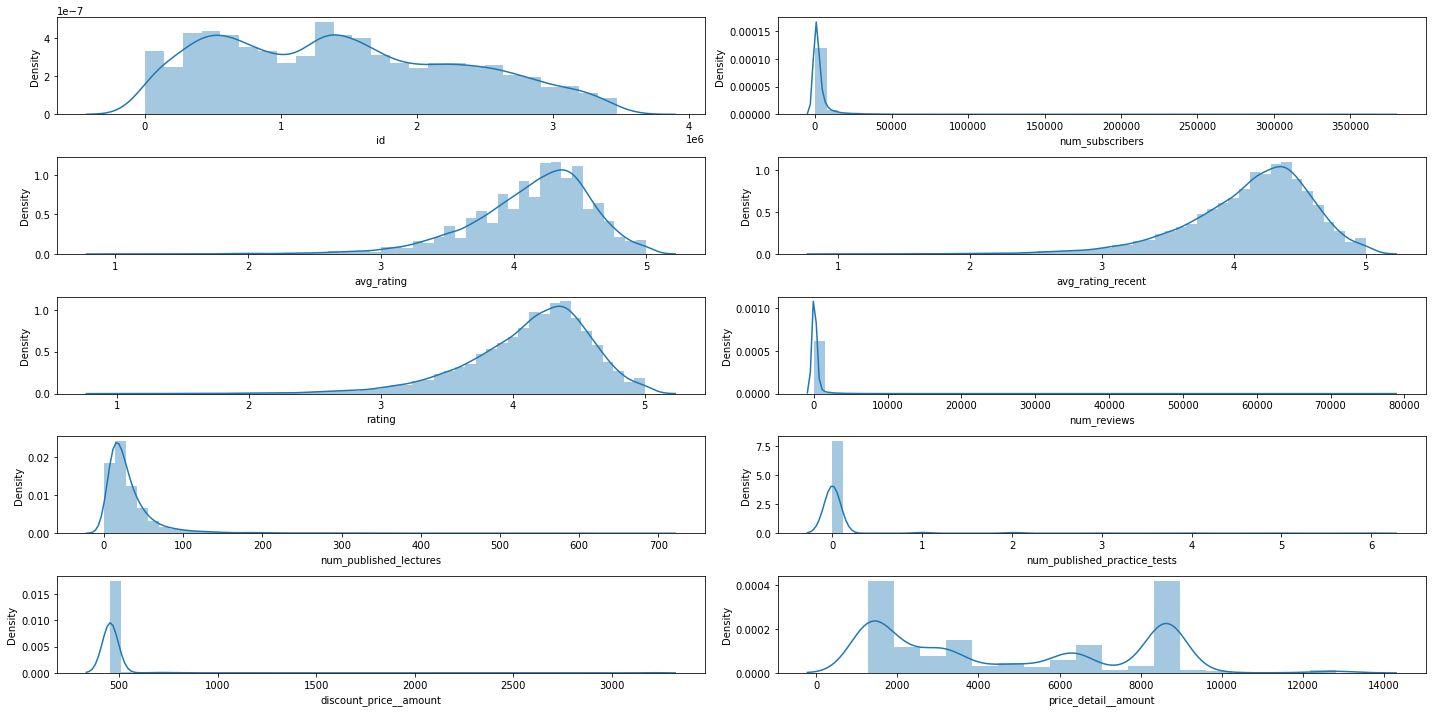

In [327]:
import warnings 
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"]=[20,10]

n_rows=5
n_cols=2
counter=1

for i in num:
    plt.subplot(n_rows,n_cols,counter)
    sns.distplot(udemy.loc[:,i].dropna())
    
    counter+=1
plt.tight_layout()
plt.show()

In [328]:
udemy.select_dtypes(include=[object,bool])

title  \
0     The Complete SQL Bootcamp 2020: Go from Zero t...   
1     Tableau 2020 A-Z: Hands-On Tableau Training fo...   
2                PMP Exam Prep Seminar -  PMBOK Guide 6   
3            The Complete Financial Analyst Course 2020   
4     An Entire MBA in 1 Course:Award Winning Busine...   
5     Microsoft Power BI - A Complete Introduction [...   
6     Agile Crash Course: Agile Project Management; ...   
7     Beginner to Pro in Excel: Financial Modeling a...   
8     Become a Product Manager | Learn the Skills & ...   
9         The Business Intelligence Analyst Course 2020   
10    Microsoft Power BI - Up & Running With Power B...   
11                       Business Analysis Fundamentals   
12              Leadership: Practical Leadership Skills   
13         The Complete Foundation Stock Trading Course   
14    SQL - MySQL for Data Analytics and Business In...   
15    The Complete Financial Analyst Training & Inve...   
16    The Ultimate Hands-On Hadoop - Tame your Big D...   
17          The Complete Investment Banking Course 2020   
18    How to Start an Amazon FBA Store on a Tight Bu...   
19    Deep Learning Prerequisites: The Numpy Stack i...   
20    Python for Finance: Investment Fundamentals & ...   
21    Forex Trading A-Z™ - With LIVE Examples of For...   
22    Introduction to Finance, Accounting, Modeling ...   
23    Write Better Emails: Tactics for Smarter Team ...   
24    Beginning Project Management: Project Manageme...   
25      The Complete Shopify Aliexpress Dropship course   
26    Writing With Flair: How To Become An Exception...   
27    Agile Fundamentals: Including Scrum and Kanban...   
28    SQL for Data Analysis: Weekender Crash Course ...   
29           Sales Training: Practical Sales Techniques   
30    Ninja Writing: The Four Levels Of Writing Mastery   
31    Tableau 20 Advanced Training: Master Tableau i...   
32    Tableau for Beginners: Get CA Certified, Grow ...   
33                                  Conscious Listening   
34    Email Etiquette: Write More Effective Emails A...   
35    The Complete Presentation and Public Speaking/...   
36    CAPM Exam Prep Seminar - PMBOK Guide, Sixth Ed...   
37            Robotic Process Automation - RPA Overview   
38    Power BI A-Z: Hands-On Power BI Training For D...   
39    Emotional Intelligence at Work: Learn from You...   
40                                    Powerful speaking   
41    eBay Drop Shipping Guide with No Inventory - W...   
42    The Complete Communication Skills Master Class...   
43      Accounting in 60 Minutes - A Brief Introduction   
44    Blockchain A-Z™: Learn How To Build Your First...   
45                                 Six Sigma White Belt   
46                          Security Awareness Training   
47    Fundamentals of Analyzing Real Estate Investments   
48    Communication Fundamentals: How To Communicate...   
49            MBA in a Box: Business Lessons from a CEO   
50    PMP EXAM PREP-Project Management Professional ...   
51          UiPath - Level 1 Robotic Process Automation   
52                  The Complete Splunk Beginner Course   
53    Build a Dropshipping Empire From Scratch [Prov...   
54          How to Manage & Influence Your Virtual Team   
55                        PMI-ACP Exam Prep for PMBOK 6   
56    Business Model Innovation: Differentiate & Gro...   
57                    Fundamentals of Business Analysis   
58    Complete Introduction to Microsoft Power BI [2...   
59    Brilliant Customer Service: How to Impress you...   
60    Creativity, Design Thinking, and Innovation fo...   
61    Accounting & Financial Statement Analysis: Com...   
62               Consulting Approach to Problem Solving   
63                          Master SQL For Data Science   
64                        How to tell a story with data   
65           Advanced Stock Trading Course + Strategies   
66    Google Analytics for Beginners | Hands-On Trai...   
67    The Complete Digital Marketing G

In [329]:
col=['id', 'num_subscribers', 'avg_rating', 'avg_rating_recent', 'rating',
       'num_reviews', 'num_published_lectures', 'num_published_practice_tests',
       'discount_price__amount', 'price_detail__amount']

<AxesSubplot:xlabel='num_subscribers', ylabel='Density'>

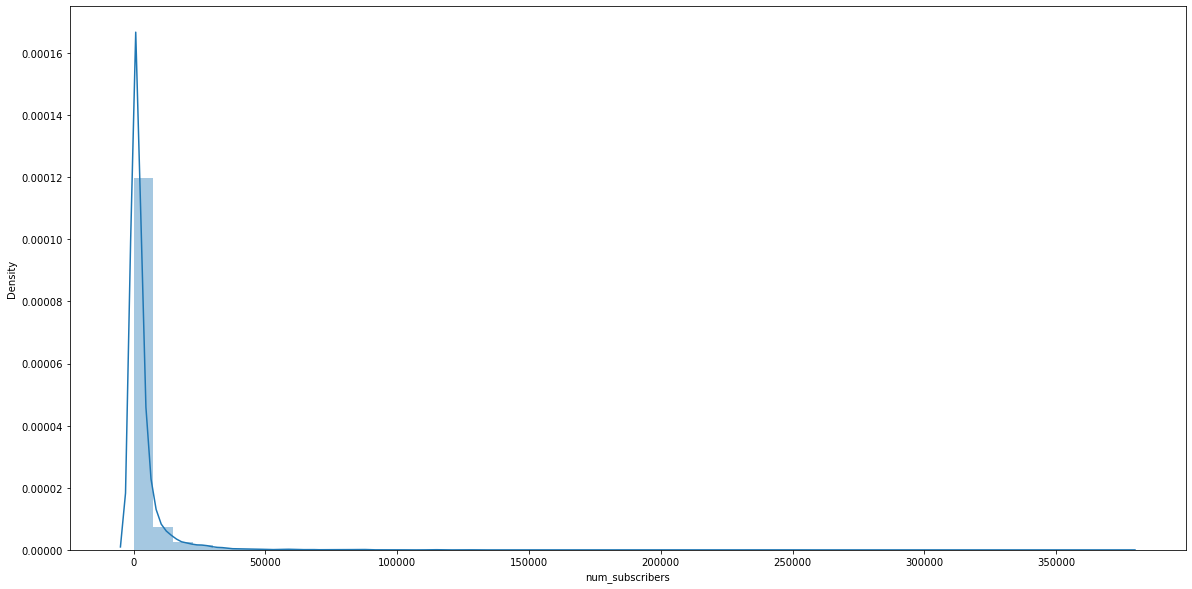

In [330]:
sns.distplot(udemy.loc[:,"num_subscribers"])

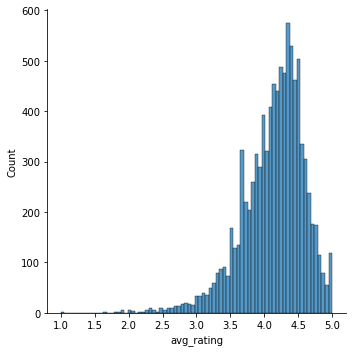

In [331]:
sns.displot(udemy.loc[:,"avg_rating"])

<AxesSubplot:xlabel='avg_rating_recent', ylabel='Density'>

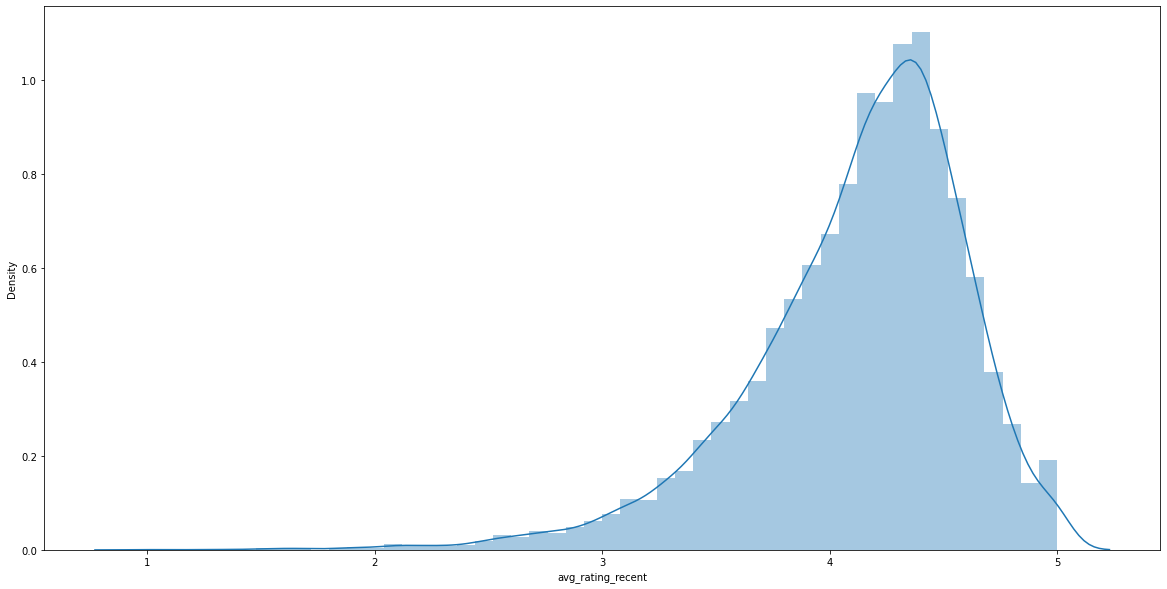

In [332]:
sns.distplot(udemy.loc[:,"avg_rating_recent"])

<AxesSubplot:xlabel='rating', ylabel='Density'>

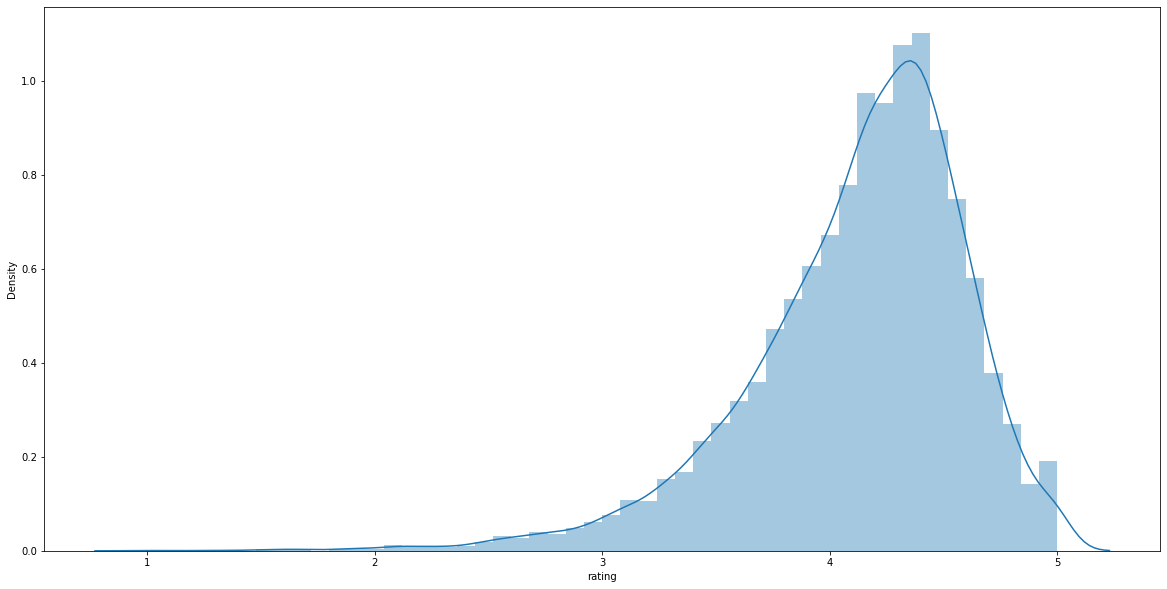

In [333]:
sns.distplot(udemy.loc[:,"rating"])

In [334]:
##Hence as we can see that there are 3 columns which have almost similar readings in the given data, and since, avg_rating,
## has a better scaled readings in its columns, so we would be dropping the remaining two columns (rating, avg_rating_recent)
## As they both do nothing but contribute as noises in the given data.

<AxesSubplot:xlabel='num_reviews', ylabel='Density'>

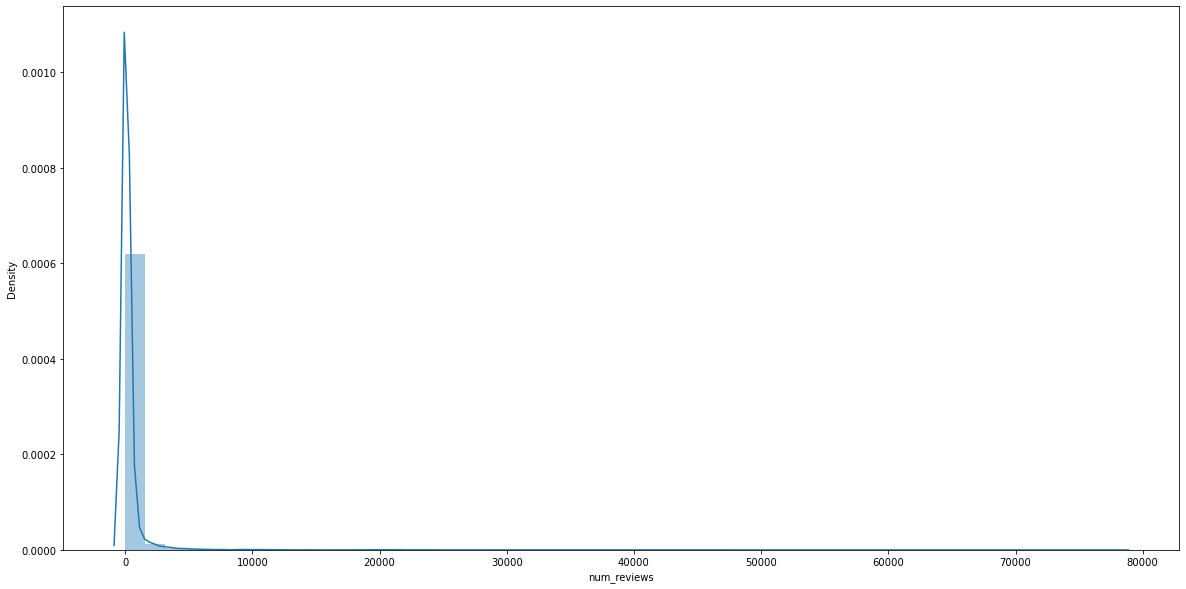

In [335]:
sns.distplot(udemy.loc[:,"num_reviews"])

<AxesSubplot:xlabel='num_published_lectures', ylabel='Density'>

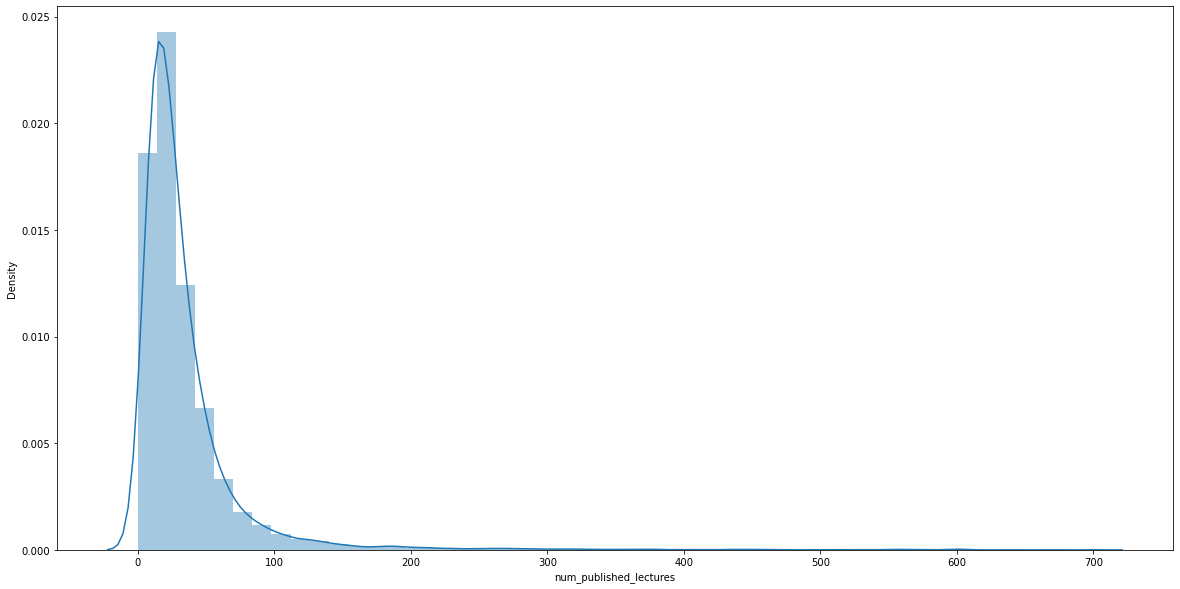

In [336]:
sns.distplot(udemy.loc[:,'num_published_lectures'])

<AxesSubplot:xlabel='num_published_practice_tests', ylabel='Density'>

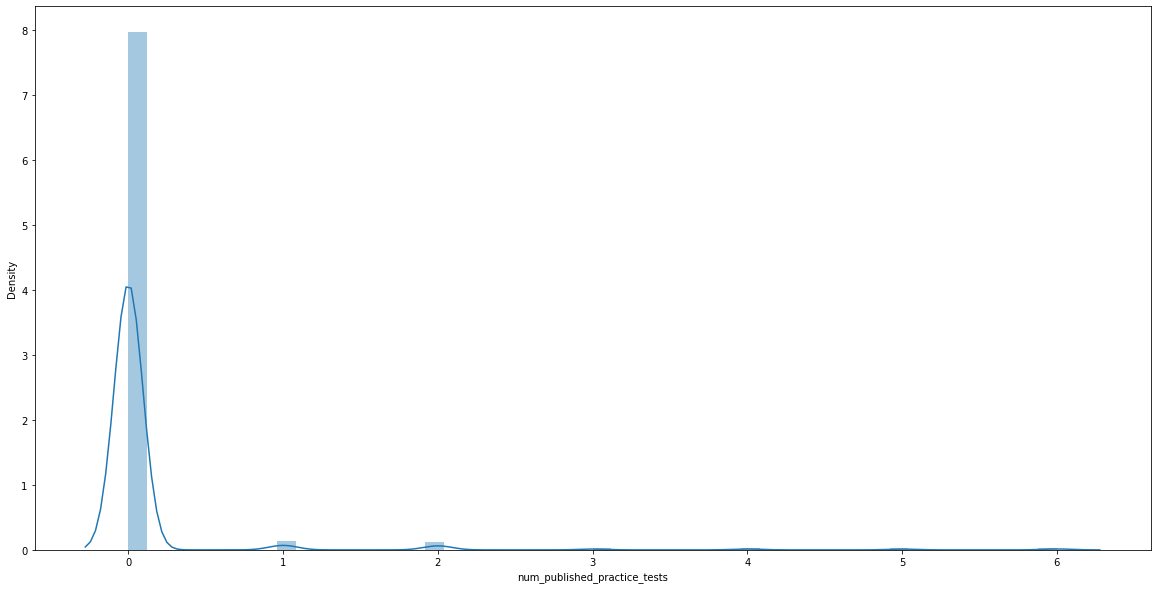

In [337]:
sns.distplot(udemy.loc[:,'num_published_practice_tests'])

<AxesSubplot:xlabel='num_published_lectures', ylabel='Density'>

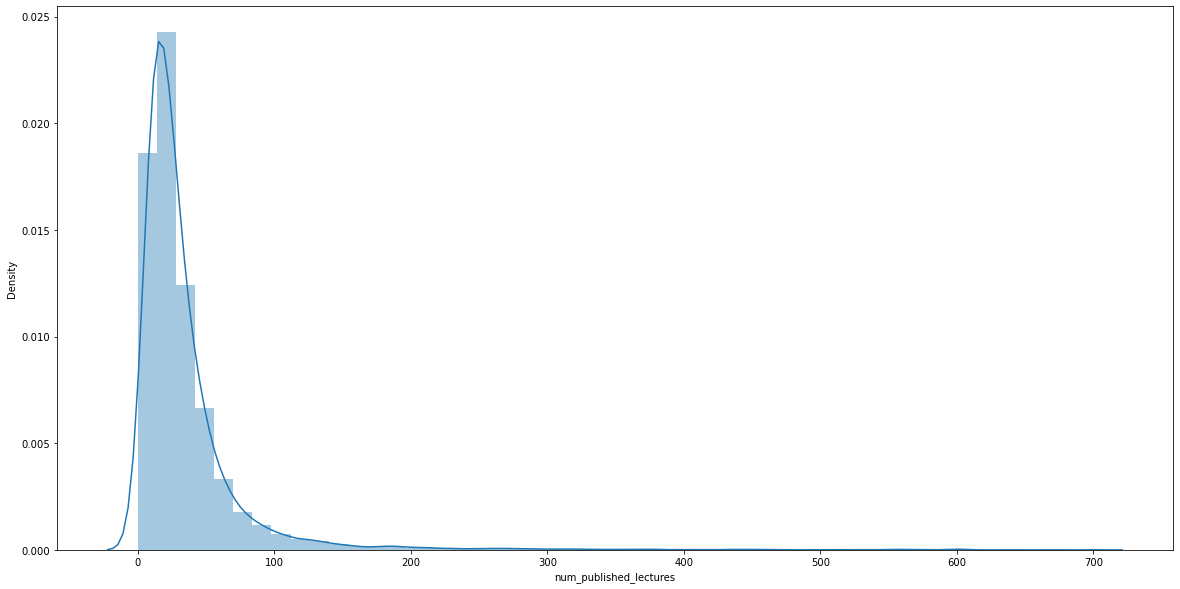

In [338]:
sns.distplot(udemy.loc[:,'num_published_lectures'])

<AxesSubplot:xlabel='discount_price__amount', ylabel='Density'>

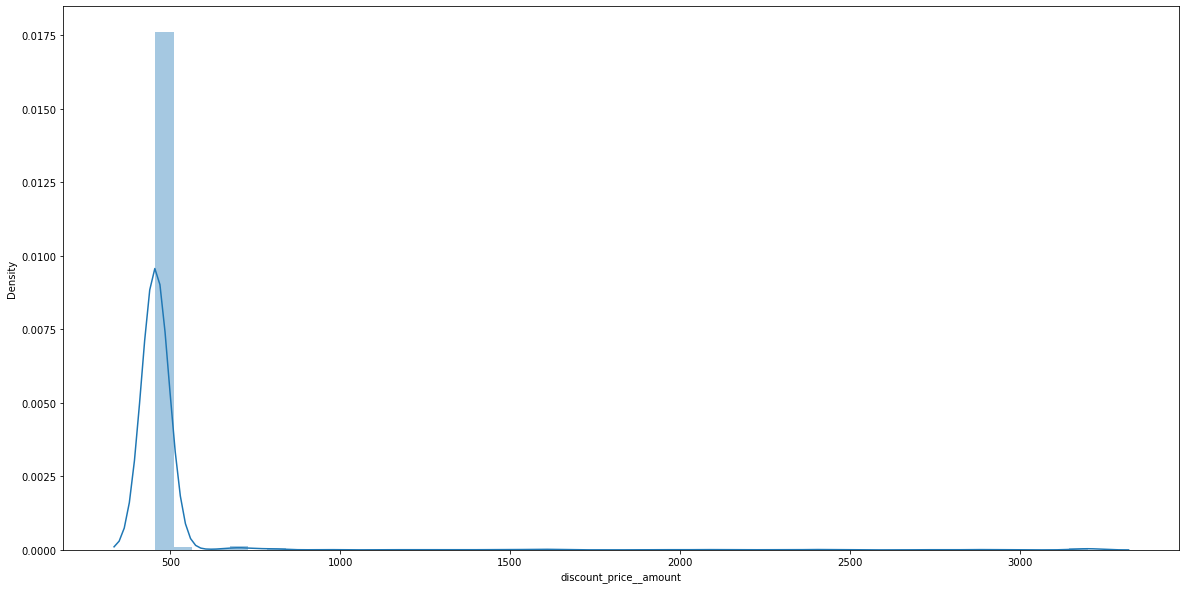

In [339]:
sns.distplot(udemy.loc[:,'discount_price__amount'])

<AxesSubplot:xlabel='price_detail__amount', ylabel='Density'>

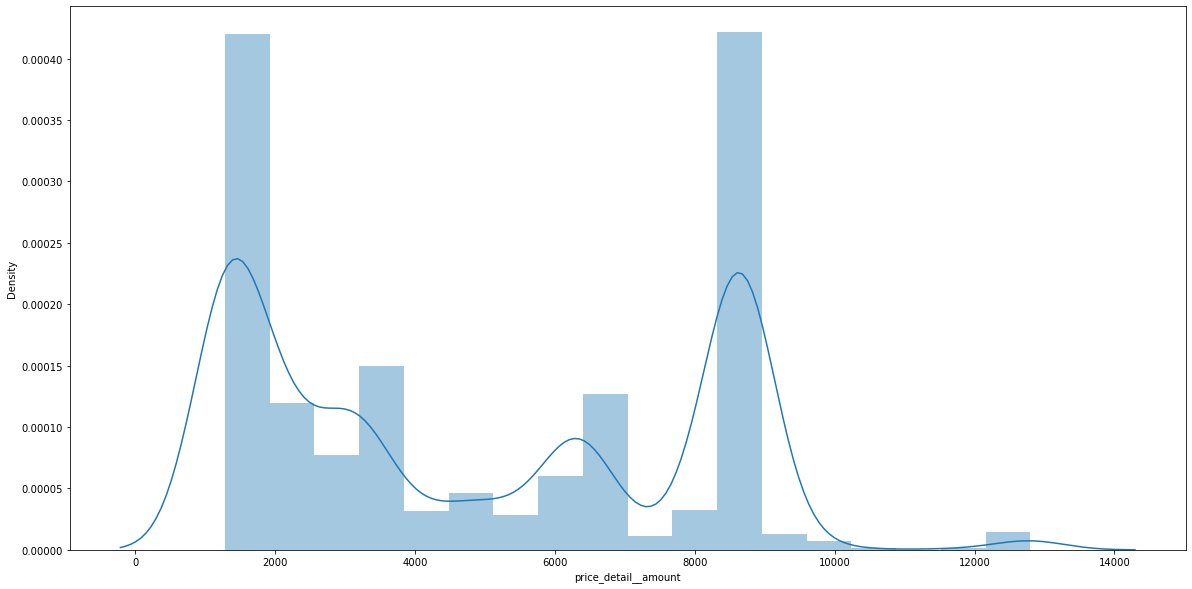

In [340]:
sns.distplot(udemy.loc[:,"price_detail__amount"])

In [341]:
udemy.head()

id                                              title  \
0   762616  The Complete SQL Bootcamp 2020: Go from Zero t...   
1   937678  Tableau 2020 A-Z: Hands-On Tableau Training fo...   
2  1361790             PMP Exam Prep Seminar -  PMBOK Guide 6   
3   648826         The Complete Financial Analyst Course 2020   
4   637930  An Entire MBA in 1 Course:Award Winning Busine...   

                                                 url  is_paid  \
0                 /course/the-complete-sql-bootcamp/     True   
1                                 /course/tableau10/     True   
2                        /course/pmp-pmbok6-35-pdus/     True   
3     /course/the-complete-financial-analyst-course/     True   
4  /course/an-entire-mba-in-1-courseaward-winning...     True   

   num_subscribers  avg_rating  avg_rating_recent   rating  num_reviews  \
0           295509    4.660190           4.678740 4.678740        78006   
1           209070    4.589560           4.600150 4.600150        54581   
2           155282    4.594910           4.593260 4.593260        52653   
3           245860    4.544070           4.537720 4.537720        46447   
4           374836    4.470800           4.471730 4.471730        41630   

   is_wishlisted  num_published_lectures  num_published_practice_tests  \
0          False                      84                             0   
1          False                      78                             0   
2          False                     292                             2   
3          False                     338                             0   
4          False                      83                             0   

                created        published_time  discount_price__amount  \
0  2016-02-14T22:57:48Z  2016-04-06T05:16:11Z              455.000000   
1  2016-08-22T12:10:18Z  2016-08-23T16:59:49Z              455.000000   
2  2017-09-26T16:32:48Z  2017-11-14T23:58:14Z              455.000000   
3  2015-10-23T13:34:35Z  2016-01-21T01:38:48Z              455.000000   
4  2015-10-12T06:39:46Z  2016-01-11T21:39:33Z              455.000000   

  discount_price__currency discount_price__price_string  price_detail__amount  \
0                      INR                         ₹455           8640.000000   
1                      INR                         ₹455           8640.000000   
2                      INR                         ₹455           8640.000000   
3                      INR                         ₹455           8640.000000   
4                      INR                         ₹455           8640.000000   

  price_detail__currency price_detail__price_string  
0                    INR                     ₹8,640  
1                    INR                     ₹8,640  
2                    INR                     ₹8,640  
3                    INR                     ₹8,640  
4                    INR                     ₹8,640

In [342]:
udem=udemy.drop(["id","url","rating","avg_rating_recent","created","published_time","discount_price__currency","discount_price__price_string","price_detail__currency","price_detail__price_string"], axis=1)

In [343]:
##Treating null values for discount_price__amount


udem.loc[udem["discount_price__amount"].isnull()]

title  is_paid  \
33                                  Conscious Listening     True   
39    Emotional Intelligence at Work: Learn from You...     True   
40                                    Powerful speaking     True   
80             Options Trading Basics (3-Course Bundle)     True   
90    Project Management Professional (PMP)® - 35 Co...     True   
95                       Seth Godin's Freelancer Course     True   
102            Mastering Agile Scrum Project Management     True   
142   Speak Like a Pro: Public Speaking for Professi...     True   
158                         Learn about Content Writing     True   
159   [BESTSELLER]™ Python Data Analysis & Visualiza...     True   
165   Think Strategically and Make Your Ideas a Reality     True   
170            Seth Godin's Value Creation Master Class     True   
172   Goal Setting at Work: Plan for Success and Rea...     True   
180                           Smart Tips: Communication     True   
210   Service Design: Designing for Experience Over ...     True   
213                Think Like a Leader with Brian Tracy     True   
223   Learn HR Fundamentals for a Career in Human Re...     True   
270   Comprehensive Guide to Financial Markets, Inve...     True   
332   OSHA Workplace Safety (General Industry 6 Hr C...     True   
350   Complete GST Course & Certification - Grow You...     True   
352           Effectively Managing Employee Performance     True   
358   Presentation Skills: Give More Powerful, Memor...     True   
388   Master "Technical Analysis and Chart reading s...     True   
394   Seeing the Big Picture: Understanding Financia...     True   
460   Ally Up: Using allyship to advance diversity &...     True   
463   Mastering Conflict Management and Resolution a...     True   
473                 Splunk 2020 - Beginner to Architect     True   
499                             Learn to Trade The News     True   
515                                 Digital Oil and Gas     True   
542   Advanced: Make and Sell Custom Shirts Using Me...     True   
566                    Modern Marketing with Seth Godin     True   
663   Diversity & Inclusion: Building a Grassroots F...     True   
697   Advanced Leadership: Managing People, Knowledg...     True   
717   Understanding Performance Management as an HR ...     True   
719   How to be a Freelance Translator (Updated for ...     True   
730                   Introductory Financial Accounting     True   
760   Certified Network Marketer (Network Marketing ...     True   
783   Jump Start Your Presentation Skills Today to B...     True   
795   Professional Technical Writing: Advance Your W...     True   
803            Option Spreads and Credit Spreads Bundle     True   
819                             Lean Project Management     True   
827                                Effective Delegation     True   
847   How a Building is Designed and Built - Part 1 ...     True   
860   Tableau 2020 Certified Associate Exam Guide A-...     True   
867                      Women's Leadership Masterclass     True   
895   Professional Trading With Institutional Supply...     True   
903   Pmp prepartion course (6th edition)-35 PDU’s i...     True   
1003  Simple & Easy - Basics of Supply Chain Managem...     True   
1018  Leadership: New Manager Training for Technical...     True   
1064                        Build a DCF Valuation Model     True   
1076  Agile Professional Certification Preparation (...     True   
1080   Online Arbitrage - Buy Products Online to Resell     True   
1088  Project Management Skills #1 - Financial Appra...     True   
1116  Become the Leader on Effective Workplace Commu...     True   
1265  Master Iron Condors - Double the credit for ha...     True   
1273                     Financial Statements Made Easy     True   
1278  Learn Primavera P6 Ver17 (in Detail in Easy En...     True   
1317  Arbitrage and Amazon's Fulfillment By Amazon (...     True   
1361  Kidpreneurs Academy - Entreprene

In [344]:
udem[["discount_price__amount","price_detail__amount"]].describe()

##Hence keeping the correlation in mind, we would be replacing the null values in discounted price amount with the median amout 
# that is 455

discount_price__amount  price_detail__amount
count             8937.000000           9447.000000
mean               488.984111           4828.758336
std                247.833161           3108.307674
min                455.000000           1280.000000
25%                455.000000           1600.000000
50%                455.000000           3840.000000
75%                455.000000           8640.000000
max               3200.000000          12800.000000

In [345]:
udem["discount_price__amount"].fillna(455.0, inplace=True)

In [346]:
udem.isnull().sum()

##Hence we have treated the missing values in the given data.

title                           0
is_paid                         0
num_subscribers                 0
avg_rating                      0
num_reviews                     0
is_wishlisted                   0
num_published_lectures          0
num_published_practice_tests    0
discount_price__amount          0
price_detail__amount            0
dtype: int64

In [347]:
## Bivariate analysis.

In [348]:
udem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9447 entries, 0 to 9446
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         9447 non-null   object 
 1   is_paid                       9447 non-null   bool   
 2   num_subscribers               9447 non-null   int64  
 3   avg_rating                    9447 non-null   float64
 4   num_reviews                   9447 non-null   int64  
 5   is_wishlisted                 9447 non-null   bool   
 6   num_published_lectures        9447 non-null   int64  
 7   num_published_practice_tests  9447 non-null   int64  
 8   discount_price__amount        9447 non-null   float64
 9   price_detail__amount          9447 non-null   float64
dtypes: bool(2), float64(3), int64(4), object(1)
memory usage: 609.0+ KB


In [349]:
udem.describe()

num_subscribers  avg_rating  num_reviews  num_published_lectures  \
count      9447.000000 9447.000000  9447.000000             9447.000000   
mean       3399.298190    4.138522   299.054515               34.400868   
std       10451.534122    0.453581  1826.867472               46.061088   
min           3.000000    1.000000     3.000000                0.000000   
25%         141.000000    3.900000    12.000000               13.000000   
50%         916.000000    4.200000    33.000000               23.000000   
75%        2889.500000    4.450000   110.000000               39.000000   
max      374836.000000    5.000000 78006.000000              699.000000   

       num_published_practice_tests  discount_price__amount  \
count                   9447.000000             9447.000000   
mean                       0.101831              487.149465   
std                        0.580037              241.172266   
min                        0.000000              455.000000   
25%                        0.000000              455.000000   
50%                        0.000000              455.000000   
75%                        0.000000              455.000000   
max                        6.000000             3200.000000   

       price_detail__amount  
count           9447.000000  
mean            4828.758336  
std             3108.307674  
min             1280.000000  
25%             1600.000000  
50%             3840.000000  
75%             8640.000000  
max            12800.000000

In [350]:
udem["num_subscribers"].value_counts()

23        43
28        38
15        38
40        36
26        36
25        35
20        35
10        34
21        33
13        33
24        32
29        32
49        32
27        31
18        30
31        30
16        30
30        29
12        29
14        29
35        29
41        28
34        28
17        28
11        27
50        27
66        27
46        27
75        26
47        26
22        26
56        25
59        25
38        25
54        24
32        24
37        24
43        24
45        24
36        24
58        23
9         23
33        22
19        22
62        21
72        21
6         20
65        20
96        20
42        19
44        19
8         18
64        18
108       18
7         18
52        17
68        17
82        17
83        17
60        17
74        17
80        17
39        17
55        17
69        15
70        15
92        15
71        14
61        14
95        14
51        14
88        14
93        14
81        14
100       13
111       13
101       13

<AxesSubplot:>

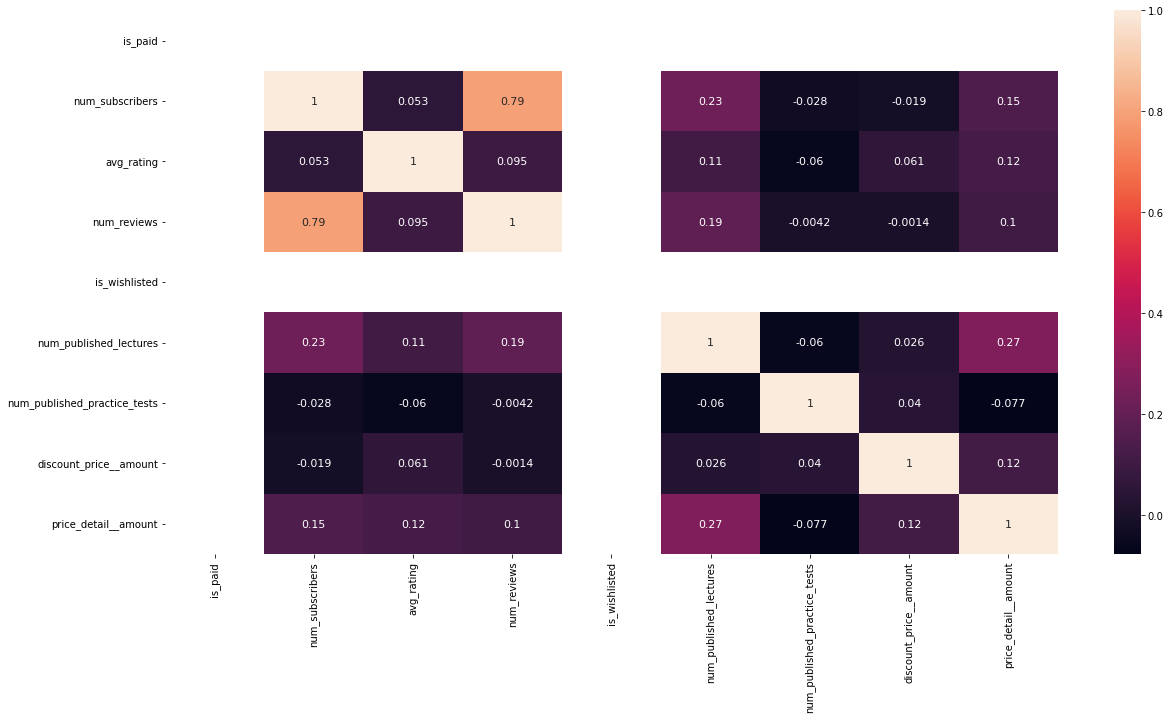

In [351]:
sns.heatmap(udem.corr(), annot= True, annot_kws={"size":11})

In [352]:
udem.columns

Index(['title', 'is_paid', 'num_subscribers', 'avg_rating', 'num_reviews',
       'is_wishlisted', 'num_published_lectures',
       'num_published_practice_tests', 'discount_price__amount',
       'price_detail__amount'],
      dtype='object')

<AxesSubplot:xlabel='num_published_lectures', ylabel='price_detail__amount'>

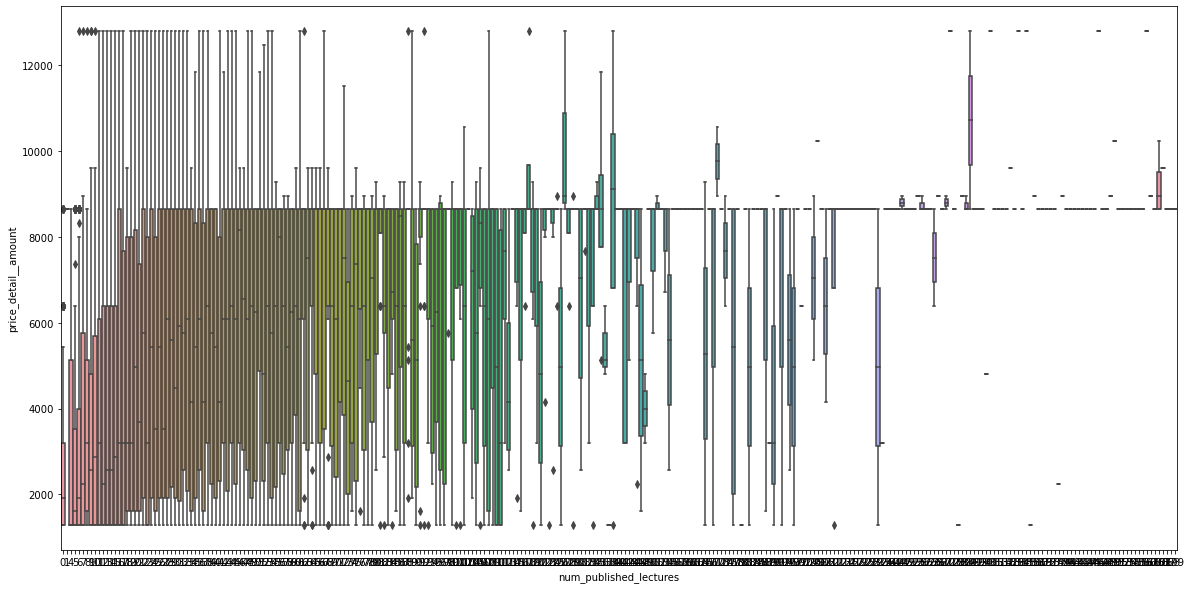

In [353]:
sns.boxplot(data=udem, x="num_published_lectures",y="price_detail__amount")

<AxesSubplot:xlabel='is_paid', ylabel='num_published_lectures'>

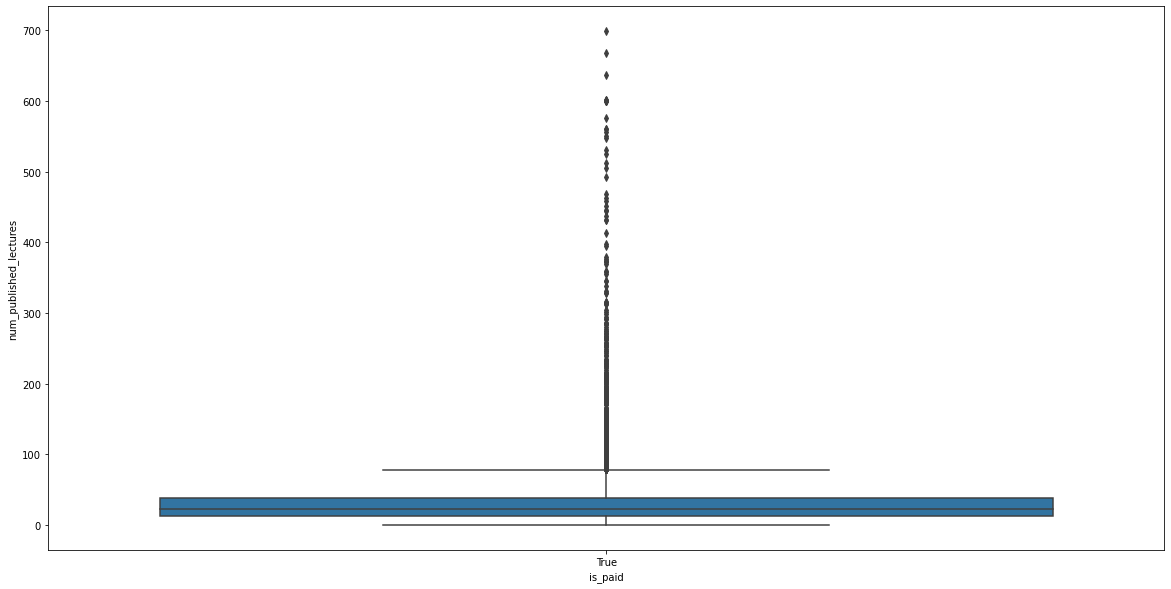

In [354]:
sns.boxplot(data=udem, x="is_paid", y="num_published_lectures")


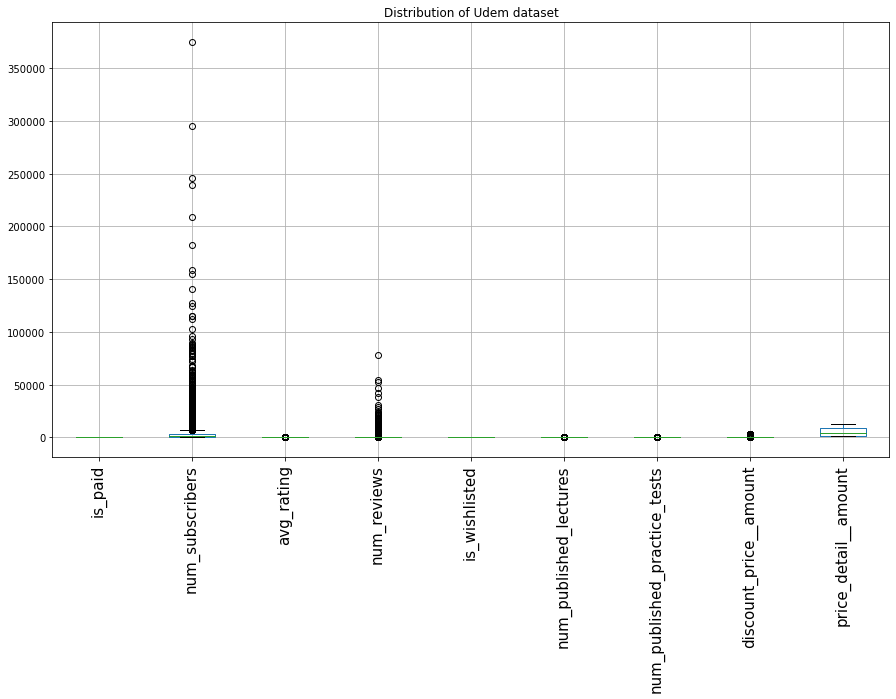

In [355]:
plt.figure(figsize=(15,8))

udem.boxplot()
plt.title("Distribution of Udem dataset")
plt.xticks(rotation="vertical", fontsize=15)
plt.show()

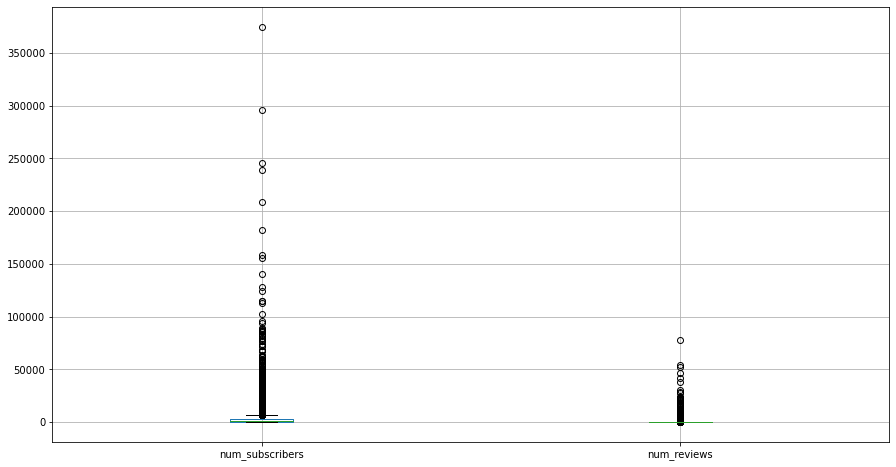

In [356]:
plt.figure(figsize = (15,8))

udem.loc[:,["num_subscribers","num_reviews"]].boxplot()
plt.show()

In [357]:
udem[["is_paid","is_wishlisted"]]=udem[["is_paid","is_wishlisted"]].astype(object)

In [358]:
# calculate the first quartile
Q1 = udem.quantile(0.25)

# calculate the third quartile
Q3 = udem.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
udem = udem[~((udem < (Q1 - 1.5 * IQR)) | (udem > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
udem.shape

(6399, 10)

In [359]:
udem["num_published_lectures"]

1381    26
1383    17
1384    50
1390    10
1391    23
1393     8
1394    27
1395    36
1396    27
1397    33
1400    28
1402    70
1403    32
1404    59
1405    38
1407    32
1408    24
1410    40
1411    14
1412    48
1414    41
1415    38
1416    63
1417    34
1418    25
1419    11
1420    15
1421    42
1426    34
1428    13
1429    14
1430    17
1431    31
1433    70
1434    77
1435    27
1436    33
1437     8
1440    20
1441    64
1443    24
1447     8
1448    33
1449    22
1450    22
1451    28
1452    11
1455    18
1457    51
1458    14
1459    11
1463    51
1465    25
1467    43
1471    61
1478    27
1479    29
1482    50
1483    75
1485    13
1486    16
1491    22
1495    18
1498    32
1501    16
1503    49
1504    25
1505    41
1507    27
1510    21
1512    13
1513    25
1514    12
1518    18
1523     9
1524    53
1526    56
1528    17
1529     7
1530    19
1532    12
1533    45
1534    27
1535     8
1536    10
1537    18
1539    16
1541    31
1542    46
1544    18
1545    34

In [360]:
udem["num_subscribers"].sort_values(ascending=False)

1734    6953
8182    6927
3895    6924
5116    6913
3731    6886
3444    6885
4923    6872
1428    6866
2234    6861
7973    6845
2626    6816
4003    6802
2453    6787
6349    6777
4658    6769
5011    6766
5749    6745
1746    6726
4272    6717
2790    6708
2628    6687
4275    6686
4019    6680
4357    6643
4450    6634
4548    6631
2587    6621
5135    6612
3528    6603
3910    6581
3423    6567
5136    6537
3056    6513
1465    6506
2966    6492
4929    6488
6153    6487
2471    6476
7417    6476
2535    6436
4814    6434
3752    6406
2771    6406
5764    6403
4445    6402
5017    6398
3567    6397
5760    6363
3632    6358
2759    6352
3022    6330
2044    6330
1958    6328
2789    6312
9159    6310
8225    6309
2508    6303
5424    6297
1729    6289
2045    6274
4457    6271
2930    6259
7521    6250
5386    6232
3887    6228
2127    6222
1738    6216
1775    6205
4040    6204
3036    6200
5196    6187
9335    6183
2381    6179
1621    6171
2777    6147
5053    6139
3405    6138

In [361]:
udem.columns

Index(['title', 'is_paid', 'num_subscribers', 'avg_rating', 'num_reviews',
       'is_wishlisted', 'num_published_lectures',
       'num_published_practice_tests', 'discount_price__amount',
       'price_detail__amount'],
      dtype='object')

In [362]:
mod=udem["num_subscribers"]
mod.shape

(6399,)

from sklearn.feature_selection import SequentialFeatureSelector as sfs

##initiate linear regression model to use in feature selection
linreg=LinearRegression()

##Buide forward feature selection.
#pass the regression model to "estimator"

linreg_forward= sfs(estimator=linreg, n_features_to_select=12, direction ="forward", scoring="r2")


sfs_forward= linreg_forward.fit(x_train_inter,y_train_inter)

print("Features selected using forward selection are : ")
print(sfs_forward.get_feature_names_out())

In [363]:
y=udem.drop("num_subscribers", axis=1)
y.shape

(6399, 9)

In [364]:
def conv(x):
    if x == "True":
        return 1
    else :
        return 0

In [365]:
udem["is_paid"]=udem['is_paid'].apply(conv)
udem["is_wishlisted"]=udem["is_wishlisted"].apply(conv)

In [366]:
udem.drop("title", axis=1, inplace=True)


In [367]:
udem.head()

is_paid  num_subscribers  avg_rating  num_reviews  is_wishlisted  \
1381        0             2337    4.541670          257              0   
1383        0             2116    4.515620          257              0   
1384        0             1320    4.263160          257              0   
1390        0             2831    4.266670          256              0   
1391        0             1497    4.666670          255              0   

      num_published_lectures  num_published_practice_tests  \
1381                      26                             0   
1383                      17                             0   
1384                      50                             0   
1390                      10                             0   
1391                      23                             0   

      discount_price__amount  price_detail__amount  
1381              455.000000           8640.000000  
1383              455.000000           2240.000000  
1384              455.000000           8640.000000  
1390              455.000000           2880.000000  
1391              455.000000           8640.000000

In [368]:
# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = udem.drop("num_subscribers", axis=1)
y = udem["num_subscribers"]

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.3)

In [369]:
print("X_train" , X_train.shape)
print("X_test",  X_test.shape)
print("y_test",  y_test.shape)
print("y_train", y_train.shape)


X_train (4479, 8)
X_test (1920, 8)
y_test (1920,)
y_train (4479,)


In [370]:
X_test.head()

is_paid  avg_rating  num_reviews  is_wishlisted  num_published_lectures  \
6885        0    3.850000           13              0                      31   
6684        0    3.450000           14              0                       8   
6614        0    4.400000           14              0                      36   
8854        0    3.375000            4              0                      26   
6278        0    3.909090           17              0                      11   

      num_published_practice_tests  discount_price__amount  \
6885                             0              455.000000   
6684                             0              455.000000   
6614                             0              455.000000   
8854                             0              455.000000   
6278                             0              455.000000   

      price_detail__amount  
6885           8640.000000  
6684           5120.000000  
6614           8640.000000  
8854           6400.000000  
6278           8640.000000

In [372]:
MLR_model= sm.OLS(y_train, X_train).fit()

print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:        num_subscribers   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     108.4
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           2.49e-88
Time:                        23:17:13   Log-Likelihood:                -38731.
No. Observations:                4479   AIC:                         7.747e+04
Df Residuals:                    4474   BIC:                         7.750e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
is_paid         